# Experiments with **findiff**

The original code developed for this study was written in Fortran IV, and used global variables for everything! I rewrote that program in Python* in 2003 as part of a course in *Object Oriented Design*, but really did not tap into the real powerof modern *Python* libraries. My goal is to fix that problem.

## Installation

The **findiff** package supports basic finite differences using arrays managed by **numpy**. In this page, we will work through an example of using this package, then apply the lessons learned to the PNS solver code.

**findiff** is installed using **pip**. Adding this requirement to **requirements.in** and running **make pyreqs** will set things up. (Remember to do that and restart the *Jupyterlab* Kernel.

## Burger's Equation

The first example we will consider is [Burger's Equation](http://en.wikipedia.org/wiki/Burgers%27_equation) using the example from Lorena Barba's CFD Python: the 12 steps to Navier-Stokes equations {cite}`barba2019`:

\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}
\end{equation}

In [1]:
### Initial Conditions

There is an analytic solution available for this equation, useful for checking errors:

\begin{equation}
u = - \frac{2\nu}{\phi}\frac{\partial \phi}{\partial x} + 4
\end{equation}

\begin{equation}
\phi = exp \Bigl(\frac{-(x - 4t)^2}{4\nu(t + 1} \Bigr) + exp\Bigl( \frac{-(x - 4t - 2\pi)}{4\nu}\Bigr)
\end{equation}

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}}{\Delta x} = \nu \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$$

As before, once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$u_i^{n+1} = u_i - u_i \frac{\Delta t}{\Delta x} (u_i - u_{i-1}) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1} - 2u_i + u_{i-1})$$


\begin{eqnarray}
    u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\
    \phi &= \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \\pi)^2}{4 \nu} \bigg)
\end{eqnarray}


\begin{eqnarray}
u &= -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\
\phi &= \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Our boundary condition will be:

$$u(0) = u(2\pi)$$

The code provided in the 12-Step lecture runs the iteration through all timesteps and displays the final solution. I think it would be more interesting to watch the solution evolve. Since we showed code that animates the PNS solver solution, all we need to do is adapt that here.

SInce this problem is so simple, I will simply let the animation code step the solution. Each time the animatio code calls fetch data, we will run the solver code and return the results.

First set up access to the required libraries: np for data, and matplotlib for graphics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next we set up parameters for the solution run

In [4]:
nx = 41
sigma = 0.5
dx = 2./(nx-1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
dt = sigma*dx**2/nu #dt is defined using sigma ... more later!

**sigma** is a parameter that controls the stability of this solution scheme. The original code used a value os 0.2. I have modified this to 0.5 here to show the problem.

Now, we set the initial conditions

In [5]:
u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5/dx) : int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.

We will calculate new values and save them in the **un** array

In [6]:
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

Now for the actual time iteration loop. This one runs **nt** steps

In [7]:
for n in range(nt):  #iterate through time
    un[:] = u[:] ##copy the existing values of u into un
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
        

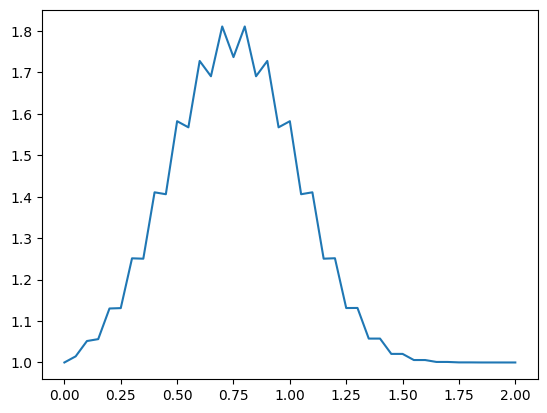

In [8]:
plt.plot(np.linspace(0,2,nx), u)

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML

In [10]:
import sys
sys.path.insert(1, '/Users/rblack/_dev/CFD-talk/Python')

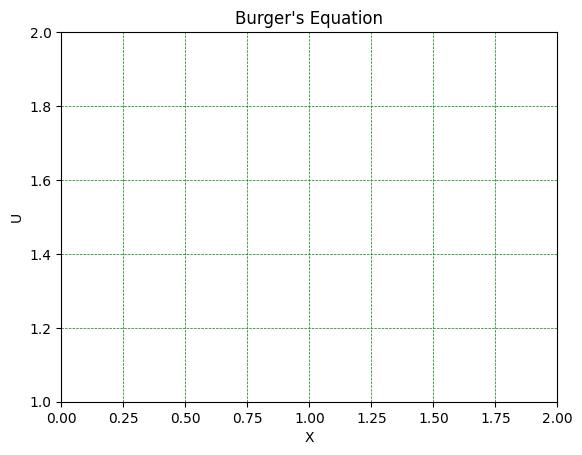

In [11]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# the test animation will display the selected property 
# curves Values run from 
ax.set_xlim((0.0, 2.0))
ax.set_ylim((1.0, 2.0))
plt.title("Burger's Equation")
plt.xlabel("X")
plt.ylabel("U")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
line, = ax.plot([], [], lw=2)

In [12]:
# reset the initial condition
u = np.ones(nx)
xl = int(0.5/dx)
xh = int(1/dx+1)
u[int(.5/dx) : int(1/dx+1)]=2
(xl,xh)

(10, 21)

In [13]:
def init():
    line.set_data([], [])    
    return (line,)

def fetchDataLine(u,i):
    '''generate data line for next time step'''
    un[:] = u[:] ##copy the existing values of u into un
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
    return u

In [14]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, nx)
    y = fetchDataLine(u,i)
    line.set_data(x, y)
    return (line,)
    

In [15]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=481, interval=50, blit=True)

In [16]:
HTML(anim.to_html5_video())

At this point, you can play with the value of **sigma** and see how it affects the solution. Try 1.0, then 0.2 to se the dramatic difference!

A *Jupyter NOtebook* is a great way to experiment, and get immediate feedback! That is why this environment is so popular in the world of *Data Science*.